In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the Titanic dataset
titanic_url = 'https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv'
titanic_df = pd.read_csv(titanic_url)

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#  Find feature names with Null values
null_features = titanic_df.columns[titanic_df.isnull().any()].tolist()
print("Features with null values:", null_features)

Features with null values: ['Age', 'Cabin', 'Embarked']


In [ ]:
# Fill missing values
mean_age = titanic_df['Age'].mean()
titanic_df['Age'].fillna(mean_age, inplace=True)
titanic_df['Cabin'].fillna('Unknown', inplace=True)


<ipython-input-6-b57b41f4ec16>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(mean_age, inplace=True)


In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


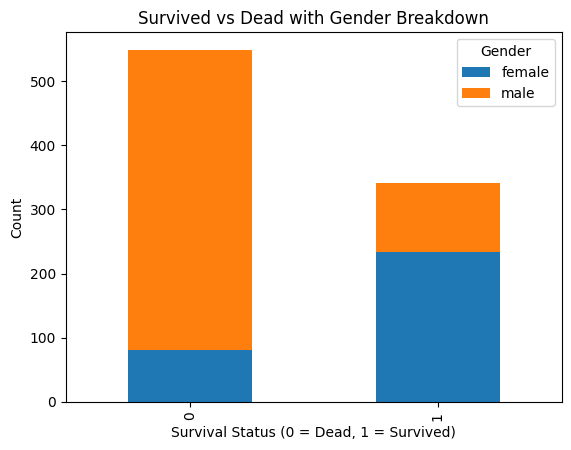

In [ ]:
#  Plot Survived vs Dead with Male and Female breakdown
survived_gender = titanic_df.groupby(['Survived', 'Sex']).size().unstack()
survived_gender.plot(kind='bar', stacked=True)
plt.title('Survived vs Dead with Gender Breakdown')
plt.xlabel('Survival Status (0 = Dead, 1 = Survived)')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

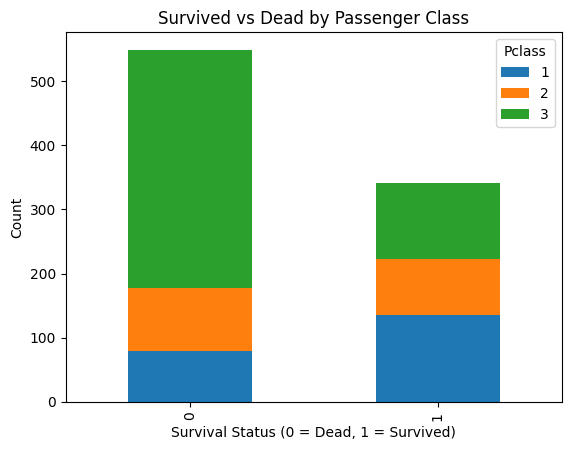

In [ ]:
# Step 5: Plot Survived vs Dead by Pclass
survived_pclass = titanic_df.groupby(['Survived', 'Pclass']).size().unstack()
survived_pclass.plot(kind='bar', stacked=True)
plt.title('Survived vs Dead by Passenger Class')
plt.xlabel('Survival Status (0 = Dead, 1 = Survived)')
plt.ylabel('Count')
plt.legend(title='Pclass')
plt.show()

In [ ]:
# Step 6: Create AgeClass column
def classify_age(age):
    if age <= 16:
        return 0
    elif age <= 26:
        return 1
    elif age <= 36:
        return 2
    elif age <= 62:
        return 3
    else:
        return 4

titanic_df['AgeClass'] = titanic_df['Age'].apply(classify_age)

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,2


In [ ]:
# Step 7: Drop the Age column
titanic_df.drop('Age', axis=1, inplace=True)

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,Unknown,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,Unknown,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,Unknown,S,2


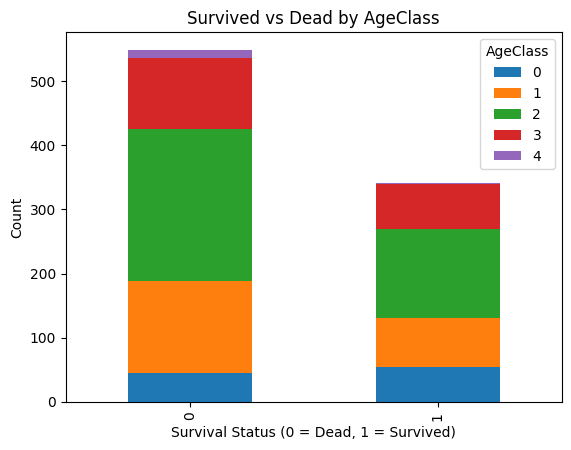

Titanic dataset manipulation and visualization completed successfully!


In [ ]:
# Step 8: Plot Survived vs Dead by AgeClass
survived_ageclass = titanic_df.groupby(['Survived', 'AgeClass']).size().unstack()
survived_ageclass.plot(kind='bar', stacked=True)
plt.title('Survived vs Dead by AgeClass')
plt.xlabel('Survival Status (0 = Dead, 1 = Survived)')
plt.ylabel('Count')
plt.legend(title='AgeClass')
plt.show()

print("Titanic dataset manipulation and visualization completed successfully!")